In [17]:
import glob
import json
import gzip
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [18]:
train_path = glob.glob('../reddit/data/json/agg/3_random/*/*')
n_posts = []
avg_score = []
avg_comm = []
for idx, f in enumerate(train_path):
    d = json.load(gzip.open(f))
    n_posts += [i['n_posts'] for i in d]
    avg_score += [i['avg_score'] for i in d]
    avg_comm += [i['avg_comm'] for i in d]

In [49]:
name = ['Number of posts per day', 'Average upvotes', 'Average nr comments']
for idx, l in enumerate([n_posts, avg_score, avg_comm]):
    print(name[idx])
    print(f'min: {np.round(np.min(l),5)}, max: {np.round(np.max(l),5)}, '
          f'mean: {np.round(np.mean(l))}, median: {np.round(np.median(l),5)}')
    print(f'.1-spaced quantiles: {[a for a in np.round(np.quantile(l, np.arange(.1, 1, .1)),5)]}')
    print('\n')

Number of posts per day
min: 0.00686, max: 255.47051, mean: 0.0, median: 0.01646
.1-spaced quantiles: [0.00823, 0.0096, 0.01097, 0.01372, 0.01646, 0.02058, 0.02606, 0.03429, 0.0535]


Average upvotes
min: 0.0, max: 15177.33333, mean: 18.0, median: 6.5
.1-spaced quantiles: [2.2, 3.07692, 4.0, 5.06667, 6.5, 8.5, 11.67857, 17.5, 32.6]


Average nr comments
min: 0.0, max: 31372.55229, mean: 11.0, median: 8.18182
.1-spaced quantiles: [3.84615, 5.07692, 6.1, 7.1, 8.18182, 9.47368, 11.16667, 13.72556, 19.0]




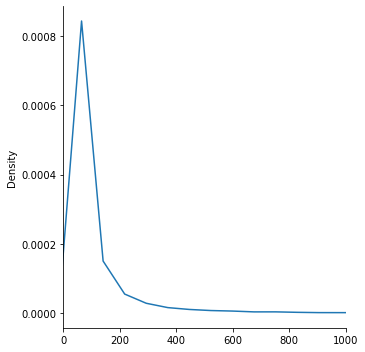

In [47]:
sns.displot(avg_score, kind='kde')
plt.xlim(0,1000)
plt.show()

In [48]:
# Remove and/or transform?